In [1]:
## Params and loading packages

## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
annotation=doc['annotation']
tss_annotation=doc['tss_annotation']



import os
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
#%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
from cycler import cycler
from Homer import *

%matplotlib inline

print('Number of tissues: ',len(tissues))

sns.set_style("whitegrid", {'axes.grid' : False})
### Till here

('Number of tissues: ', 15)


In [ ]:
import Homer

## Distance to TSS

In [2]:
tss = pd.read_csv(tss_annotation,sep='\t',index_col=0)

## -1kb:+100

In [3]:
txn_pd = pickle.load(open("Results/tss_annotation/txn_df_02.p",'rb'))

In [4]:
anno_peaks = pd.read_csv('Results/merged/peaks_with_tss_distances.tsv',sep='\t',index_col=0)
anno_peaks = anno_peaks[(~(anno_peaks['Distance to TSS']==np.infty))]
anno_peaks = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 2000]

In [6]:
(14937806+14938107)/2 - 14938115

-159

In [5]:
anno_peaks.head()

,Chr,Start,End,Strand,Stat,Annotation,Nearest TSS,Distance to TSS,isSameStrand,Nearest gene,Nearest gene_id
ID,,,,,,,,,,,
1,picr_27,14937806,14938107,-,22.268621,promoter-TSS (asmbl_40109),asmbl_40105,-159.0,False,RBM25,gene_13991_3
7,picr_400,32968,33226,+,2.272000,"exon (asmbl_53606, exon 1 of 14)",asmbl_53606,1083.0,False,TDRKH,gene_18985
8,picr_22,15316872,15317057,-,3.462000,Intergenic,asmbl_35383,-1303.0,True,LIN28A,gene_12328
9,picr_27,12170488,12170819,+,2.062000,Intergenic,asmbl_40010,-1173.0,False,CCDC177,gene_13964
11,picr_109,4367271,4367474,+,8.010000,promoter-TSS (asmbl_9543),asmbl_9543,-911.0,False,TRIM67,gene_3222


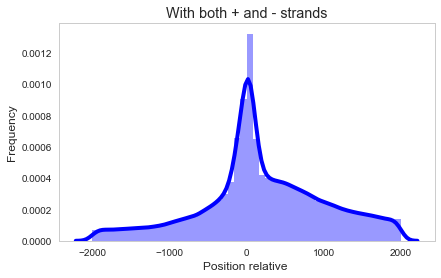

In [7]:
sns.distplot(anno_peaks['Distance to TSS'])
plt.ylabel('Frequency')
plt.title('With both + and - strands')
plt.xlabel('Position relative ')
plt.savefig("Results/Figures/Distance_to_TSS_neg_included.png")

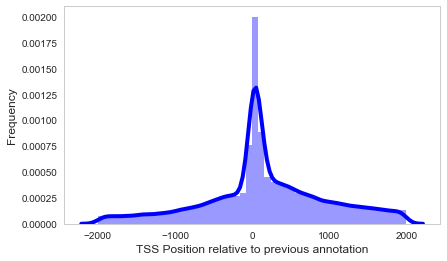

In [8]:
sns.distplot(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Figures/Distance_to_TSS.png",bbox_inches='tight')

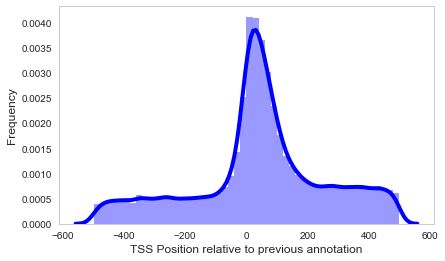

In [9]:
anno_500 = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 500]
sns.distplot(anno_500[anno_500['isSameStrand']]['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Figures/Distance_to_TSS_500.png",bbox_inches='tight')

### Look at ones only in CHO

In [8]:
peak_tissue_matrix = pd.read_csv('Results/merged/peaks_tissues.csv',index_col=0)
peak_tissue_matrix = peak_tissue_matrix[peak_tissue_matrix.index.isin(anno_peaks[anno_peaks['isSameStrand']].index)]

## Take the max between the two
cho_peaks = peak_tissue_matrix.loc[:,peak_tissue_matrix.columns.str.contains('CHO')].max(axis=1)

## cho_peaks greater than 0
cho_peaks = cho_peaks[(cho_peaks>0)].index #

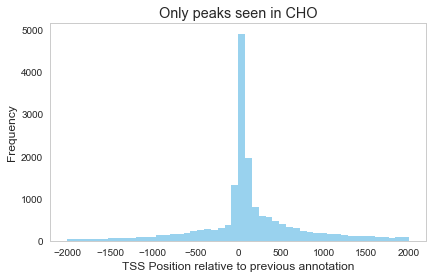

In [9]:
sns.distplot(anno_peaks[anno_peaks['isSameStrand']].loc[cho_peaks,'Distance to TSS'],norm_hist=False,kde=False)
plt.title('Only peaks seen in CHO')
plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Figures/Distance_to_TSS_CHO.png",bbox_inches='tight')

## -1kb:+1kb

In [10]:
txn_pd = pickle.load(open("Results/txn_df_1kb_1kb.p",'rb'))

In [11]:
anno_peaks = pd.read_csv('Results/peaks_with_tss_and_gene.tsv',sep='\t',index_col=0)
anno_peaks = anno_peaks[(~(anno_peaks['Distance to TSS']==np.infty))]
anno_peaks = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 2000]

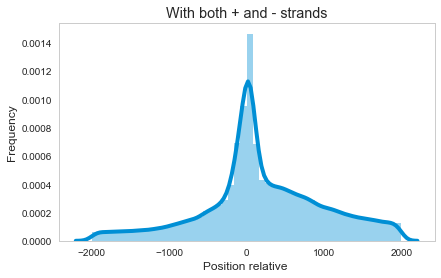

In [12]:
sns.distplot(anno_peaks['Distance to TSS'])
plt.ylabel('Frequency')
plt.title('With both + and - strands')
plt.xlabel('Position relative ')

plt.savefig("Results/Figures/Distance_to_TSS_neg_included_1kb_1kb.png")

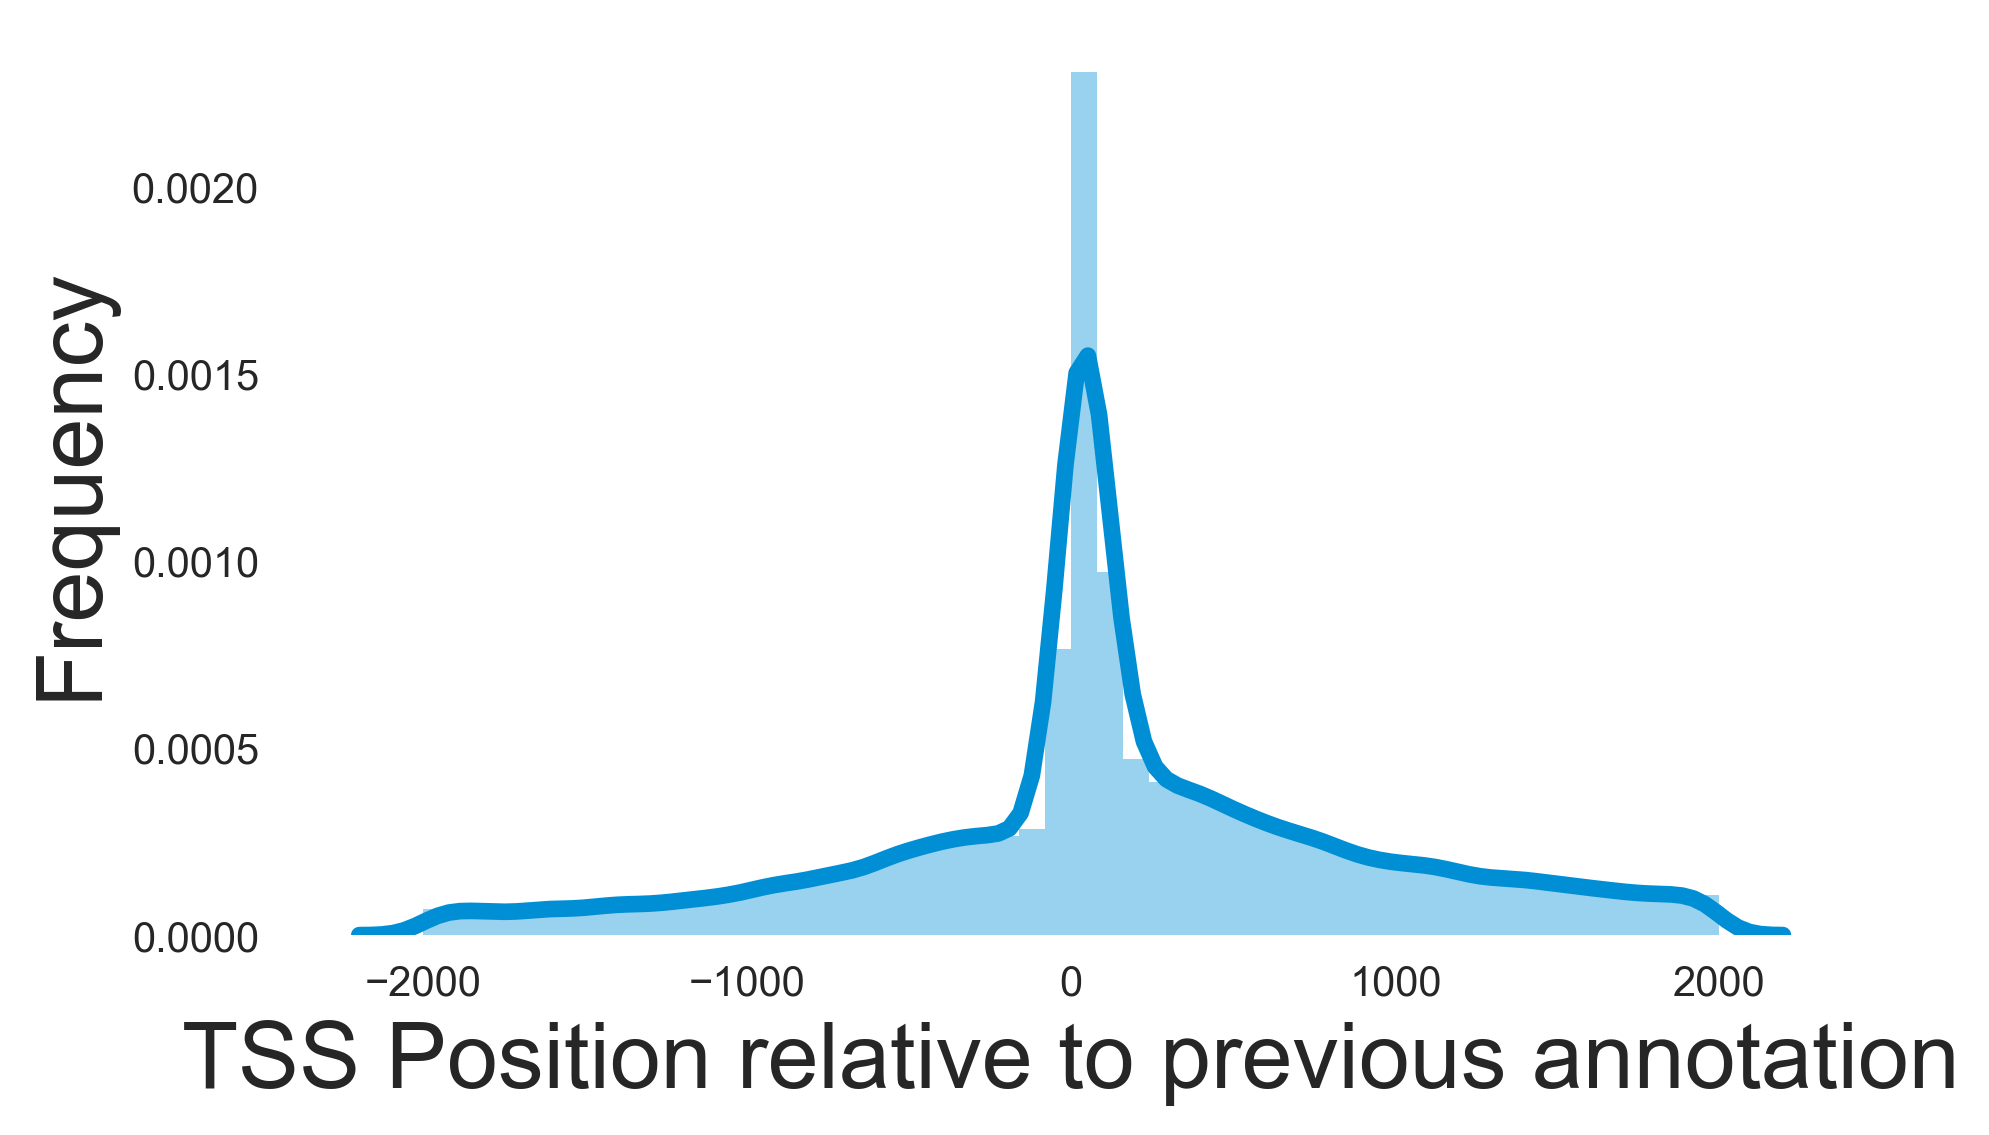

In [28]:
f = plt.figure(dpi=300)
ax = sns.distplot(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.ylabel('Frequency',{'fontsize':22})
plt.xlabel('TSS Position relative to previous annotation',{'fontsize':22})

ax.set_facecolor([1,1,1])
plt.savefig("Results/Figures/Distance_to_TSS_1kb_1kb.png",bbox_inches='tight')

In [32]:
sns.distplot?

In [33]:
f.add_subplot?

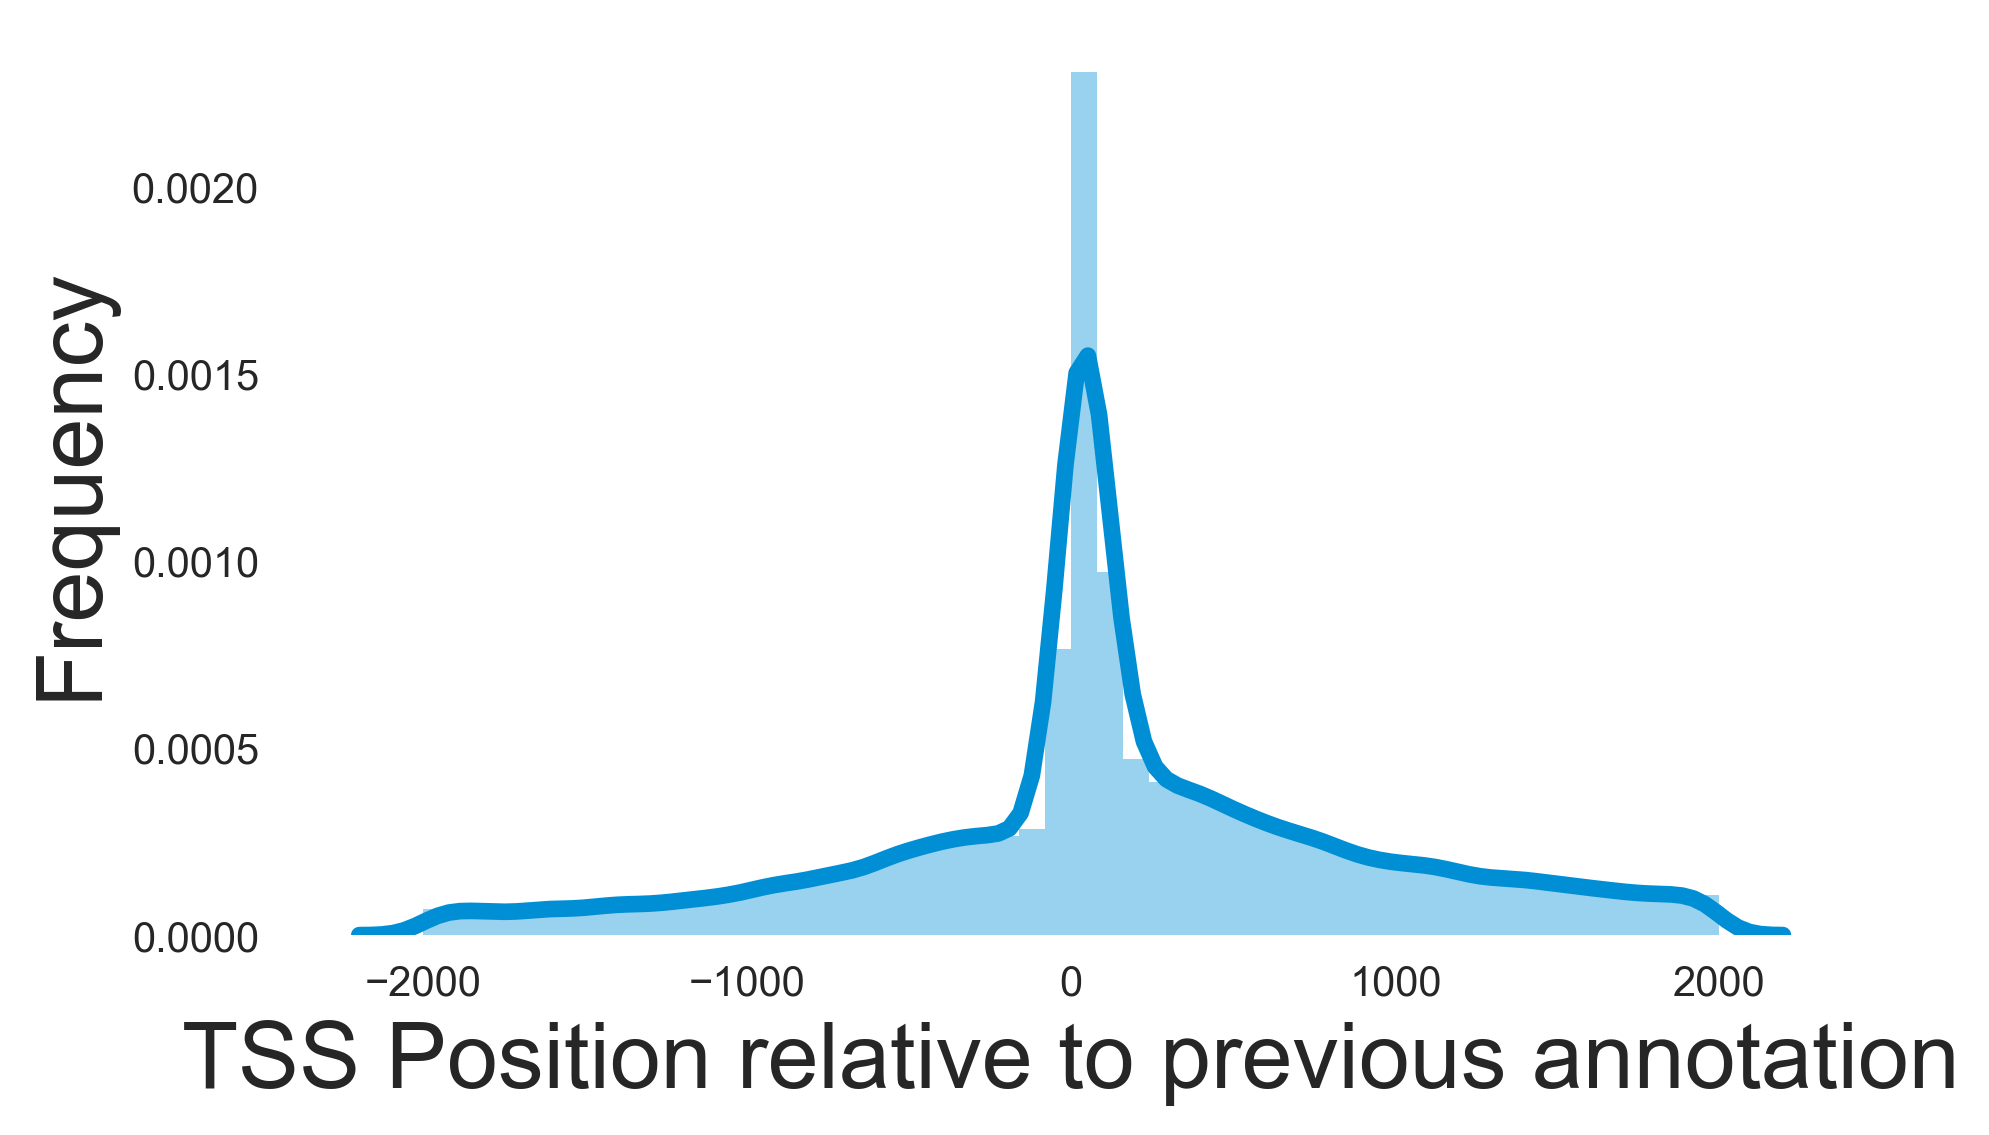

In [35]:
f = plt.figure(dpi=300)
ax = f.add_subplot()
sns.set_style("white")
ax = sns.distplot(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'],ax = ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.ylabel('Frequency',{'fontsize':22})
plt.xlabel('TSS Position relative to previous annotation',{'fontsize':22})

ax.set_facecolor([1,1,1])
plt.savefig("Results/Figures/Distance_to_TSS_1kb_1kb.pdf",bbox_inches='tight')

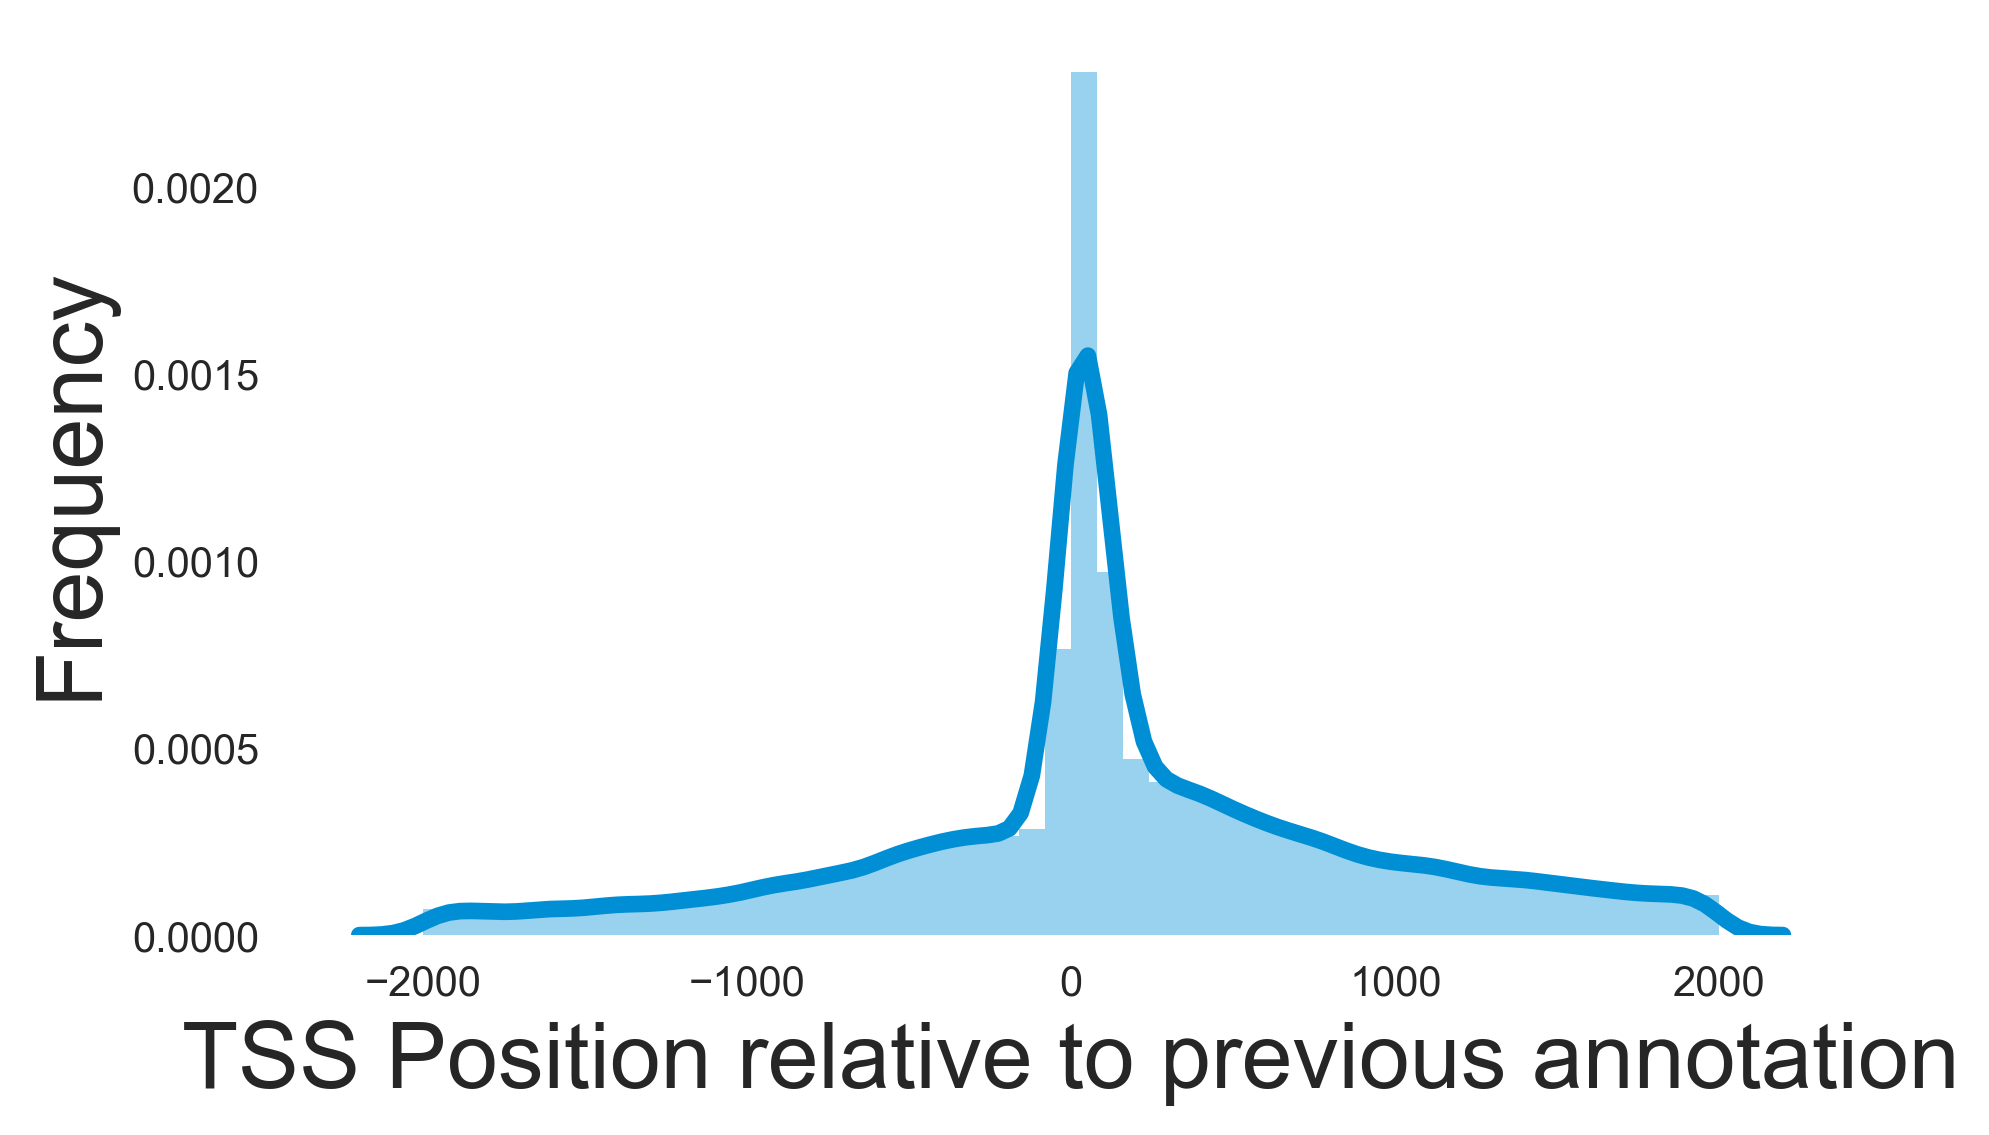

In [36]:
f = plt.figure(dpi=300)
ax = f.add_subplot()
sns.set_style("white")
ax = sns.distplot(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'],ax = ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.ylabel('Frequency',{'fontsize':22})
plt.xlabel('TSS Position relative to previous annotation',{'fontsize':22})

ax.set_facecolor([1,1,1])
plt.savefig("Results/Figures/Distance_to_TSS_1kb_1kb.svg")

In [14]:
print(np.sum(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'] < 10))
print(anno_peaks[anno_peaks['isSameStrand']].shape )

15672
(43862, 13)


In [15]:
print(np.sum(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'] < 100))
print(anno_peaks[anno_peaks['isSameStrand']].shape )

23872
(43862, 13)


In [16]:
print(np.sum(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'] < 500))
print(anno_peaks[anno_peaks['isSameStrand']].shape )

32072
(43862, 13)


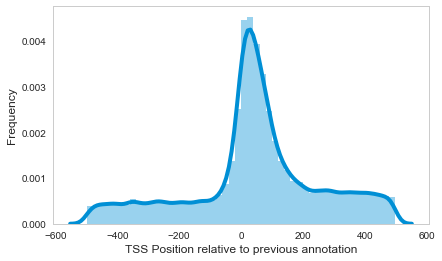

In [17]:
anno_500 = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 500]
sns.distplot(anno_500[anno_500['isSameStrand']]['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Figures/Distance_to_TSS_500_1kb_1kb.png",bbox_inches='tight')

### Look at ones only in CHO

In [18]:
peak_tissue_matrix = pd.read_csv('Results/merged/peaks_tissues.csv',index_col=0)
peak_tissue_matrix = peak_tissue_matrix[peak_tissue_matrix.index.isin(anno_peaks[anno_peaks['isSameStrand']].index)]

## Take the max between the two
cho_peaks = peak_tissue_matrix.loc[:,peak_tissue_matrix.columns.str.contains('CHO')].max(axis=1)

## cho_peaks greater than 0
cho_peaks = cho_peaks[(cho_peaks>0)].index #

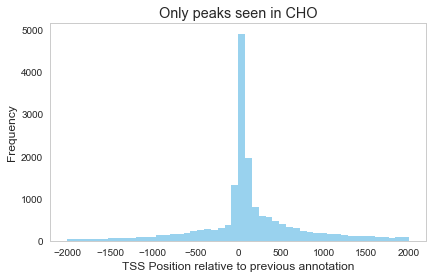

In [19]:
f = plt.figure(dpi=300)
sns.distplot(anno_peaks[anno_peaks['isSameStrand']].loc[cho_peaks,'Distance to TSS'],norm_hist=False,kde=False)
plt.title('Only peaks seen in CHO')
plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Figures/Distance_to_TSS_CHO_1kb_1kb.png",bbox_inches='tight')

## Using output bed

In [92]:
bed_df = Homer.read_bed_file("Results/output/TSS1.exp.bed")
bed_df["exp_Start"] = (bed_df["Start"] +  bed_df["End"])/2
meta_df = pd.read_csv("Results/output/TSS1.exp.meta",sep="\t",index_col=0)

bed_df.head()


,Chr,Start,End,Strand,Stat,exp_Start
ID,,,,,,
p1@RRP7A_gene_2_asmbl_4,picr_0,45848,45998,-,0.606381,45923.0
p1@RRP7A_gene_2_asmbl_10,picr_0,44417,44567,-,1.264818,44492.0
p1@SERHL_gene_1_4_asmbl_14,picr_0,20916,21066,+,2.055760,20991.0
p1@POLDIP3_gene_3_1_asmbl_17,picr_0,98730,98880,-,1.896526,98805.0
p1@POLDIP3_gene_3_1_asmbl_19,picr_0,78181,78331,-,1.567026,78256.0


In [93]:
tss = pd.read_csv("/data/isshamie/genome/picr_final/mRNA_final.gff3",sep="\t",header=None)
tss["actual_start"] = tss.apply(lambda x: x[3] if x[6] == "+" else x[4],axis=1)
tss["Transcript"] = tss[8].apply(lambda x: x.split("transcript_id=")[1].split(";")[0])

tss.head()

,0,1,2,3,4,5,6,7,8,actual_start,Transcript
0,picr_0,merge,mRNA,10,41421,.,+,.,ID=asmbl_1;Parent=gene_1_1;gene_id=gene_1_1;ge...,10,asmbl_1
1,picr_0,merge,mRNA,176,38694,.,+,.,ID=asmbl_2;Parent=gene_1_2;gene_id=gene_1_2;ge...,176,asmbl_2
2,picr_0,merge,mRNA,3880,39299,.,+,.,ID=asmbl_3;Parent=gene_1_3;gene_id=gene_1_3;ge...,3880,asmbl_3
3,picr_0,merge,mRNA,7715,46630,.,-,.,ID=asmbl_4;Parent=gene_2;gene_id=gene_2;gene=R...,46630,asmbl_4
4,picr_0,merge,mRNA,7715,44542,.,-,.,ID=asmbl_5;Parent=gene_2;gene_id=gene_2;gene=R...,44542,asmbl_5


In [94]:
for ind, val in tqdm.tqdm_notebook(meta_df.iterrows()):
    meta_df.at[ind,"ref_start"] = tss[val["Transcript"] == tss["Transcript"]]["actual_start"].values[0]

In [96]:
bed_df.loc[bed_df.index.isin(meta_df.index)]#,"exp_start"]

,Chr,Start,End,Strand,Stat,exp_Start
ID,,,,,,
p1@RRP7A_gene_2_asmbl_4,picr_0,45848,45998,-,0.606381,45923.0
p1@RRP7A_gene_2_asmbl_10,picr_0,44417,44567,-,1.264818,44492.0
p1@SERHL_gene_1_4_asmbl_14,picr_0,20916,21066,+,2.055760,20991.0
p1@POLDIP3_gene_3_1_asmbl_17,picr_0,98730,98880,-,1.896526,98805.0
p1@POLDIP3_gene_3_1_asmbl_19,picr_0,78181,78331,-,1.567026,78256.0
p1@CYB5R3_gene_3_2_asmbl_20,picr_0,92621,92771,-,0.278067,92696.0
p2@CYB5R3_gene_3_2_asmbl_20,picr_0,92124,92274,-,0.741152,92199.0
p1@A4GALT_gene_4_3_asmbl_24,picr_0,186234,186384,-,1.019532,186309.0
p1@A4GALT_gene_4_3_asmbl_30,picr_0,185651,185801,-,1.647383,185726.0


Mean: -8.4591738304
Std: 394.885544205
Absolute Mean: 282.479515987
Absolute Std: 276.064256454


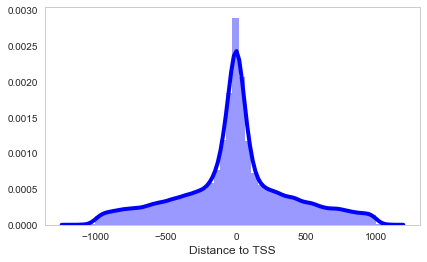

In [100]:
meta_df["Distance to TSS"] = bed_df.loc[bed_df.index.isin(meta_df.index),"exp_Start"] - meta_df["ref_start"]

sns.distplot(meta_df["Distance to TSS"])

print("Mean: %s" % (np.mean(meta_df["Distance to TSS"])))
print("Std: %s" % (np.std(meta_df["Distance to TSS"])))

print("Absolute Mean: %s" % (np.mean(np.abs(meta_df["Distance to TSS"]))))
print("Absolute Std: %s" % (np.std(np.abs(meta_df["Distance to TSS"]))))

In [104]:
val

Tissues                    CHO
cs                        0b00
CHO ATAC Region            NaN
ID                      215685
Gene                     RRP7A
Gene ID                 gene_2
Transcript             asmbl_4
Is Experimental              1
ref_start                46630
Distance to TSS           -707
Distance to TSS Alt        NaN
Name: p1@RRP7A_gene_2_asmbl_4, dtype: object

In [105]:
for ind,val in tqdm.tqdm_notebook(meta_df.iterrows()):
    #meta_df.at[ind,"Distance to TSS Alt"] = bed_df.loc[bed_df.index.isin(meta_df.index),"exp_Start"] - meta_df["ref_start"]

    if  bed_df.loc[ind,"Strand"] == '+':
        meta_df.at[ind,"Distance to TSS Alt"] = bed_df.loc[ind,"exp_Start"] - val["ref_start"]
    else:
        meta_df.at[ind,"Distance to TSS Alt"] = val["ref_start"] - bed_df.loc[ind,"exp_Start"] 


Mean: -7.26406502681
Std: 394.909336435
Absolute Mean: 282.479515987
Absolute Std: 276.064256454


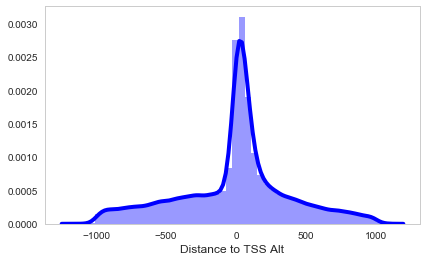

In [108]:
sns.distplot(meta_df["Distance to TSS Alt"])

print("Mean: %s" % (np.mean(meta_df["Distance to TSS Alt"])))
print("Std: %s" % (np.std(meta_df["Distance to TSS Alt"])))

print("Absolute Mean: %s" % (np.mean(np.abs(meta_df["Distance to TSS Alt"]))))
print("Absolute Std: %s" % (np.std(np.abs(meta_df["Distance to TSS Alt"]))))

Mean: -7.26406502681
Std: 394.909336435
Absolute Mean: 282.479515987
Absolute Std: 276.064256454


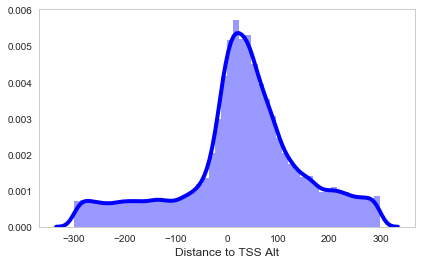

In [110]:
sns.distplot(meta_df[np.abs(meta_df["Distance to TSS Alt"])<300]["Distance to TSS Alt"])

print("Mean: %s" % (np.mean(meta_df["Distance to TSS Alt"])))
print("Std: %s" % (np.std(meta_df["Distance to TSS Alt"])))

print("Absolute Mean: %s" % (np.mean(np.abs(meta_df["Distance to TSS Alt"]))))
print("Absolute Std: %s" % (np.std(np.abs(meta_df["Distance to TSS Alt"]))))

Mean: -7.26406502681
Std: 394.909336435
Absolute Mean: 282.479515987
Absolute Std: 276.064256454


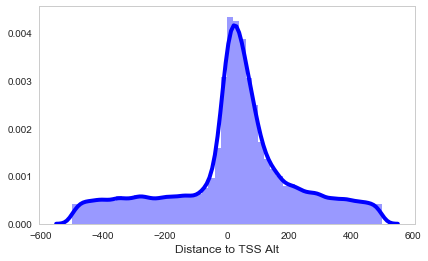

In [111]:
sns.distplot(meta_df[np.abs(meta_df["Distance to TSS Alt"])<500]["Distance to TSS Alt"])

print("Mean: %s" % (np.mean(meta_df["Distance to TSS Alt"])))
print("Std: %s" % (np.std(meta_df["Distance to TSS Alt"])))

print("Absolute Mean: %s" % (np.mean(np.abs(meta_df["Distance to TSS Alt"]))))
print("Absolute Std: %s" % (np.std(np.abs(meta_df["Distance to TSS Alt"]))))

In [47]:
meta_tss = pd.merge(meta_df,tss,how="inner",on="Transcript",validate="one_to_one")
meta_tss.set_index("")
meta_tss.head()

MergeError: Merge keys are not unique in left dataset; not a one-to-one merge